# Mental Health Analysis and Depression Prediction

##### Problems Faced

+ High Depression Rates Impacting Productivity
+ Insufficient Data-Driven Interventions
+ Low Engagement with Mental Health Support

##### Business Need

+ Early Identification of Mental Health Issues
+ Insights into Key Factors Driving Depression
+ Designing Personalized Mental Health Programs
+ Enhancing Productivity and Well-Being
+ Data-Driven Decision Making

## Basics

### Importing Required Libraries

In [304]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency
import scipy.stats as stats
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OrdinalEncoder, LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score,confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

### Read and Understand Data

In [8]:
# Import data
df=pd.read_csv("Dataset/Depression_Survey.csv")

In [9]:
# Number of rows and columns
df.shape

(2556, 19)

In [10]:
# Viewing sample data
df.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
1790,Vihaan,Male,21,Thane,Working Professional,Marketing Manager,NaN,3.0,NaN,NaN,4.0,Less than 5 hours,Unhealthy,MA,Yes,3,1,No,No
1610,Shiv,Male,31,Faridabad,Student,NaN,5.0,NaN,9.74,5.0,NaN,Less than 5 hours,Healthy,MD,Yes,12,2,Yes,Yes
1765,Aahana,Female,45,Ghaziabad,Working Professional,Teacher,NaN,2.0,NaN,NaN,1.0,7-8 hours,Moderate,B.Arch,No,1,5,No,No
649,Shreya,Female,22,Agra,Student,NaN,3.0,NaN,8.04,5.0,NaN,Less than 5 hours,Healthy,BA,Yes,7,5,No,Yes
654,Aanchal,Female,53,Kalyan,Working Professional,Researcher,NaN,5.0,NaN,NaN,1.0,7-8 hours,Moderate,BE,No,4,3,No,No


In [11]:
def categorize(value):
    if value.startswith('B'):
        return 'UnderGraduate'
    elif value.startswith('M'):
        return 'PostGraduate'
    elif value.startswith('L') and value.endswith('M'):
        return 'PostGraduate'
    elif value.startswith('L') and value.endswith('B'):
        return 'UnderGraduate'
    else:
        return value

In [12]:
df['New_Degree'] = df['Degree'].apply(categorize)

In [13]:
#list columns and their data types
print("Columns and Data Types for Train Data: ")
columns_dtypes = {columns: df[columns].dtype for columns in df.columns}
for col, dtype in columns_dtypes.items():
    print(f"{col}: {dtype}")

Columns and Data Types for Train Data: 
Name: object
Gender: object
Age: int64
City: object
Working Professional or Student: object
Profession: object
Academic Pressure: float64
Work Pressure: float64
CGPA: float64
Study Satisfaction: float64
Job Satisfaction: float64
Sleep Duration: object
Dietary Habits: object
Degree: object
Have you ever had suicidal thoughts ?: object
Work/Study Hours: int64
Financial Stress: int64
Family History of Mental Illness: object
Depression: object
New_Degree: object


In [14]:
# Checking for null values
df.isnull().mean()

Name                                     0.000000
Gender                                   0.000000
Age                                      0.000000
City                                     0.000000
Working Professional or Student          0.000000
Profession                               0.263302
Academic Pressure                        0.803599
Work Pressure                            0.196401
CGPA                                     0.803599
Study Satisfaction                       0.803599
Job Satisfaction                         0.196401
Sleep Duration                           0.000000
Dietary Habits                           0.000000
Degree                                   0.000000
Have you ever had suicidal thoughts ?    0.000000
Work/Study Hours                         0.000000
Financial Stress                         0.000000
Family History of Mental Illness         0.000000
Depression                               0.000000
New_Degree                               0.000000


In [15]:
# Basic Statistics
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,2556.0,39.043036,12.260596,18.00,28.00,39.000,50.000,60.0
Academic Pressure,502.0,3.003984,1.390007,1.00,2.00,3.000,4.000,5.0
Work Pressure,2054.0,3.021908,1.417312,1.00,2.00,3.000,4.000,5.0
CGPA,502.0,7.567809,1.465367,5.03,6.21,7.605,8.825,10.0
Study Satisfaction,502.0,3.075697,1.373490,1.00,2.00,3.000,4.000,5.0
Job Satisfaction,2054.0,3.015093,1.418432,1.00,2.00,3.000,4.000,5.0
Work/Study Hours,2556.0,6.023865,3.771743,0.00,3.00,6.000,9.000,12.0
Financial Stress,2556.0,2.968701,1.415527,1.00,2.00,3.000,4.000,5.0


In [16]:
#check duplicate
print("Number of duplicate rows in dataset: ", df.duplicated().sum())

Number of duplicate rows in dataset:  0


In [17]:
# Check Correlation
df.corr(numeric_only=True,method='spearman')

,Age,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Work/Study Hours,Financial Stress
Age,1.000000,0.023960,0.001319,0.014314,-0.004300,-0.045031,-0.024820,0.014789
Academic Pressure,0.023960,1.000000,NaN,-0.009869,-0.102670,NaN,0.049792,0.002324
Work Pressure,0.001319,NaN,1.000000,NaN,NaN,-0.012750,-0.056263,0.020161
CGPA,0.014314,-0.009869,NaN,1.000000,-0.064767,NaN,0.046344,0.032600
Study Satisfaction,-0.004300,-0.102670,NaN,-0.064767,1.000000,NaN,-0.012268,-0.039261
Job Satisfaction,-0.045031,NaN,-0.012750,NaN,NaN,1.000000,0.007761,-0.005728
Work/Study Hours,-0.024820,0.049792,-0.056263,0.046344,-0.012268,0.007761,1.000000,0.002489
Financial Stress,0.014789,0.002324,0.020161,0.032600,-0.039261,-0.005728,0.002489,1.000000


## EDA

### Univariate EDA

In [20]:
df.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
2113,Kian,Male,45,Ludhiana,Working Professional,Pharmacist,NaN,5.0,NaN,NaN,4.0,5-6 hours,Moderate,B.Pharm,Yes,9,2,No,No,UnderGraduate
2441,Aditi,Female,39,Nagpur,Working Professional,Digital Marketer,NaN,5.0,NaN,NaN,2.0,7-8 hours,Unhealthy,BA,Yes,2,2,Yes,No,UnderGraduate
2077,Armaan,Male,52,Pune,Working Professional,Graphic Designer,NaN,3.0,NaN,NaN,2.0,More than 8 hours,Moderate,PhD,No,11,1,No,No,PhD
984,Arya,Male,34,Meerut,Student,NaN,2.0,NaN,7.1,3.0,NaN,5-6 hours,Moderate,Class 12,No,12,2,No,No,Class 12
1534,Vani,Female,30,Pune,Working Professional,NaN,NaN,2.0,NaN,NaN,5.0,Less than 5 hours,Unhealthy,Class 12,No,5,2,No,No,Class 12


C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\1281512880.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Gender',data=df, palette = "Set1")


<Axes: xlabel='Gender', ylabel='count'>

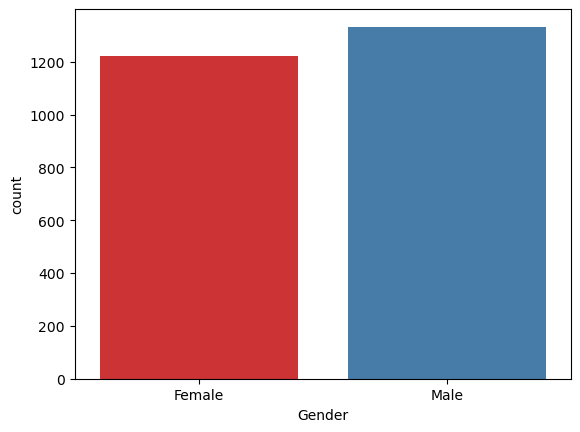

In [21]:
sns.countplot(x='Gender',data=df, palette = "Set1")


<Axes: ylabel='count'>

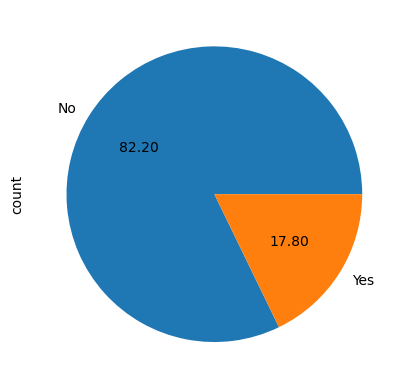

In [22]:
df['Depression'].value_counts().plot(kind='pie',autopct='%.2f')

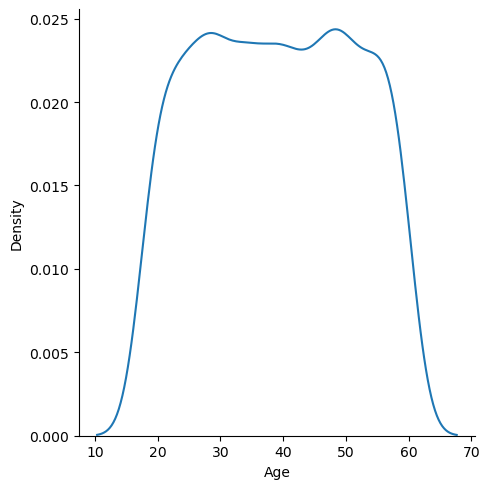

In [23]:
sns.displot(df['Age'],kind='kde')

<Axes: ylabel='Age'>

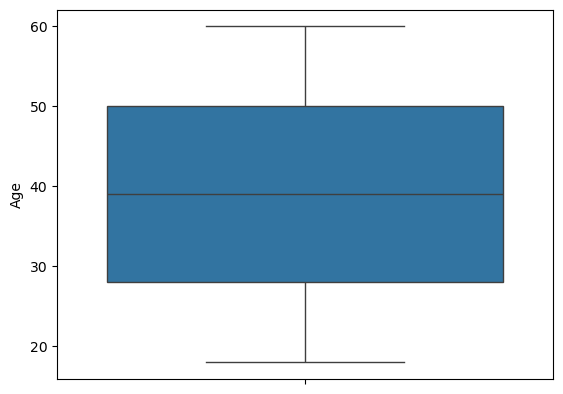

In [24]:
sns.boxplot(df['Age'])

In [25]:
df['City'].nunique()

30

<Axes: ylabel='count'>

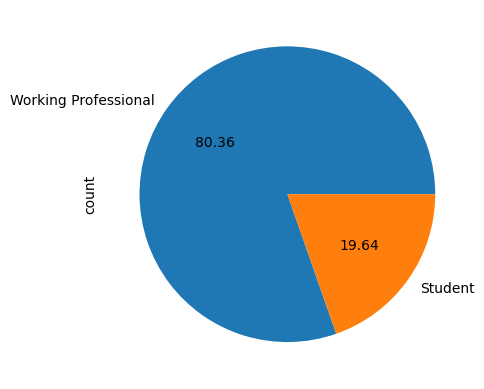

In [26]:
df['Working Professional or Student'].value_counts().plot(kind='pie',autopct='%.2f')

In [27]:
df['Profession'].nunique()

35

In [28]:
df['Academic Pressure'].value_counts()

Academic Pressure
3.0    125
1.0     99
5.0     98
4.0     92
2.0     88
Name: count, dtype: int64

<Axes: xlabel='Academic Pressure', ylabel='count'>

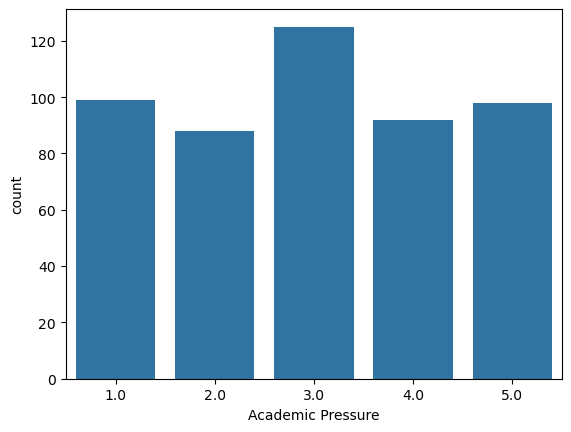

In [29]:
sns.countplot(x='Academic Pressure',data=df,)

In [30]:
df['Work Pressure'].value_counts()

Work Pressure
5.0    424
2.0    413
4.0    412
3.0    404
1.0    401
Name: count, dtype: int64

<Axes: xlabel='Work Pressure', ylabel='count'>

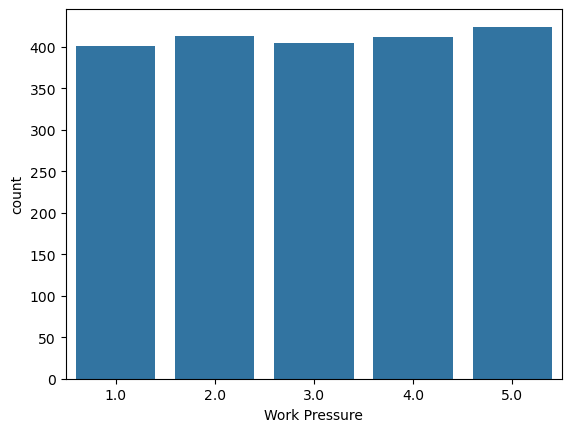

In [31]:
sns.countplot(x='Work Pressure',data=df,)

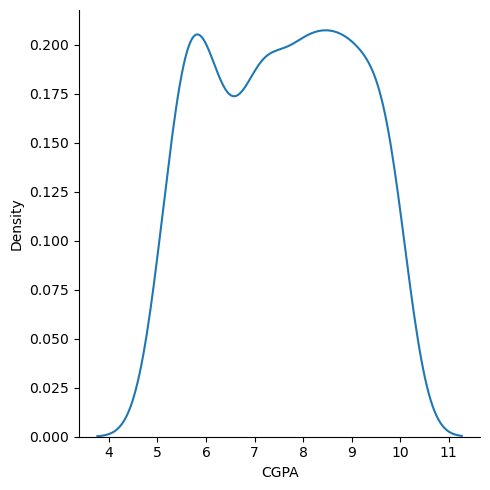

In [32]:
sns.displot(df['CGPA'],kind='kde')

<Axes: ylabel='CGPA'>

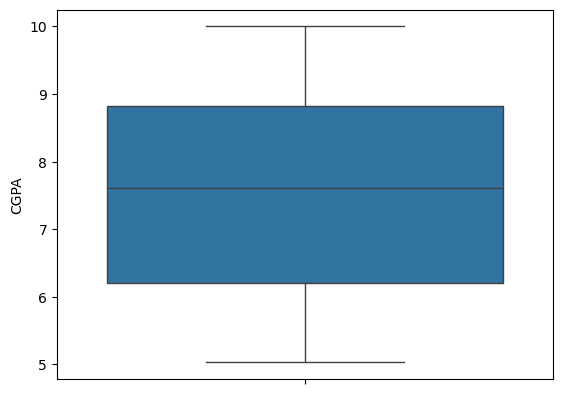

In [33]:
sns.boxplot(df['CGPA'])

In [34]:
df['Study Satisfaction'].value_counts()

Study Satisfaction
4.0    116
3.0    103
2.0    100
5.0     97
1.0     86
Name: count, dtype: int64

<Axes: xlabel='Study Satisfaction', ylabel='count'>

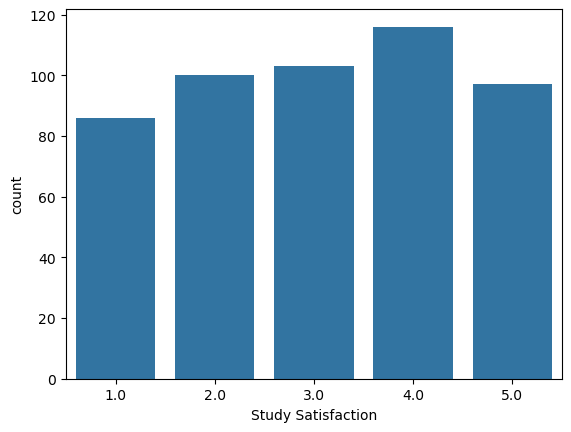

In [35]:
sns.countplot(x='Study Satisfaction',data=df)

In [36]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
5.0    431
2.0    431
3.0    404
1.0    396
4.0    392
Name: count, dtype: int64

<Axes: xlabel='Job Satisfaction', ylabel='count'>

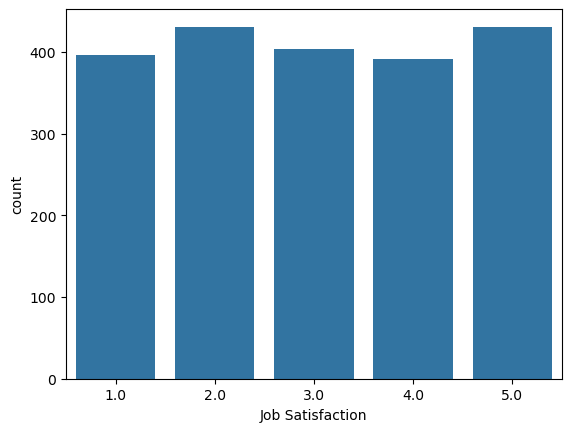

In [37]:
sns.countplot(x='Job Satisfaction',data=df,)

In [38]:
df['Sleep Duration'].value_counts()

Sleep Duration
7-8 hours            658
Less than 5 hours    648
5-6 hours            628
More than 8 hours    622
Name: count, dtype: int64

In [39]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    882
Healthy      842
Moderate     832
Name: count, dtype: int64

In [40]:
df['Have you ever had suicidal thoughts ?'].value_counts()

Have you ever had suicidal thoughts ?
No     1307
Yes    1249
Name: count, dtype: int64

In [41]:
df['Degree'].nunique()

27

In [42]:
df['Family History of Mental Illness'].value_counts()

Family History of Mental Illness
No     1311
Yes    1245
Name: count, dtype: int64

<Axes: ylabel='Density'>

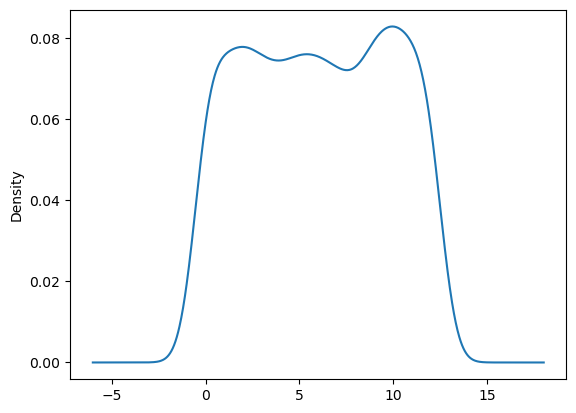

In [43]:
df['Work/Study Hours'].plot(kind='kde')

In [44]:
df['Depression'].value_counts()

Depression
No     2101
Yes     455
Name: count, dtype: int64

### Multivariate EDA

In [46]:
df.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
1154,Pihu,Female,38,Meerut,Working Professional,Researcher,NaN,5.0,NaN,NaN,3.0,Less than 5 hours,Moderate,BCA,No,2,2,No,No,UnderGraduate
72,Rohan,Male,43,Faridabad,Working Professional,Finanancial Analyst,NaN,1.0,NaN,NaN,3.0,More than 8 hours,Healthy,MSc,Yes,12,3,Yes,No,PostGraduate
952,Ritvik,Male,22,Bhopal,Student,NaN,3.0,NaN,7.04,4.0,NaN,5-6 hours,Healthy,B.Com,Yes,11,2,Yes,Yes,UnderGraduate
1033,Anand,Male,53,Ahmedabad,Working Professional,Accountant,NaN,3.0,NaN,NaN,3.0,7-8 hours,Healthy,M.Com,Yes,2,5,No,No,PostGraduate
1172,Rajveer,Male,55,Agra,Working Professional,Content Writer,NaN,4.0,NaN,NaN,5.0,More than 8 hours,Moderate,B.Ed,Yes,12,5,No,No,UnderGraduate


<Axes: xlabel='Gender', ylabel='Job Satisfaction'>

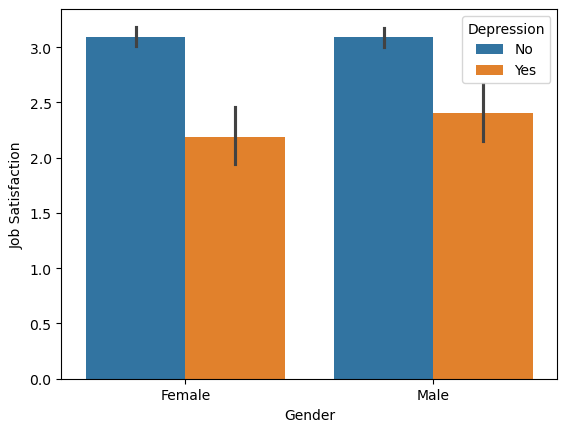

In [47]:
sns.barplot(
    data = df, x= 'Gender', y= 'Job Satisfaction', hue='Depression'
)

<Axes: xlabel='Depression', ylabel='Job Satisfaction'>

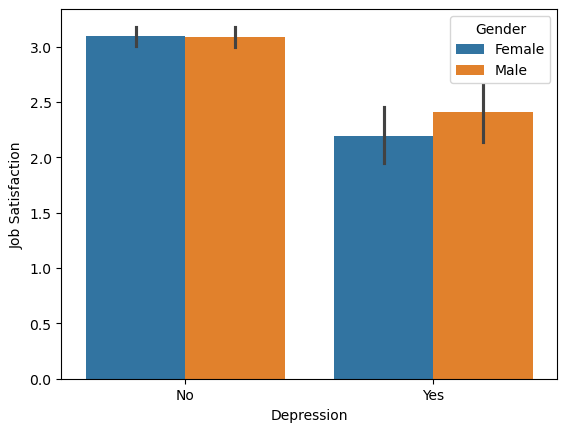

In [48]:
sns.barplot(data=df, x='Depression',y='Job Satisfaction',hue='Gender')

<Axes: xlabel='Working Professional or Student', ylabel='Age'>

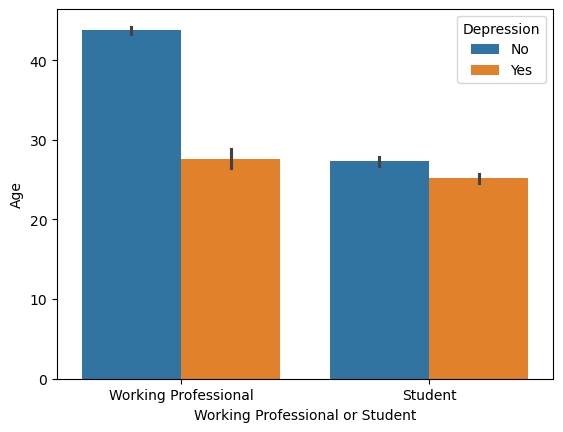

In [50]:
sns.barplot(data=df,x='Working Professional or Student',y='Age',hue='Depression')

<Axes: xlabel='Depression', ylabel='Age'>

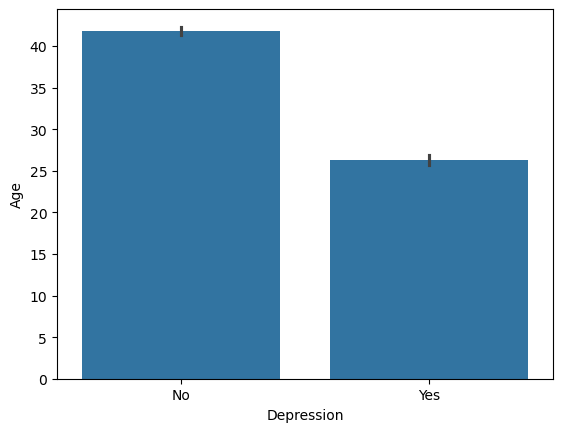

In [51]:
sns.barplot(data=df,x='Depression',y='Age')

In [52]:
df['Age'].describe()

count    2556.000000
mean       39.043036
std        12.260596
min        18.000000
25%        28.000000
50%        39.000000
75%        50.000000
max        60.000000
Name: Age, dtype: float64

In [53]:
df[df['Working Professional or Student']=='Student']['Age'].describe()

count    502.000000
mean      26.241036
std        4.896501
min       18.000000
25%       22.000000
50%       26.500000
75%       30.000000
max       34.000000
Name: Age, dtype: float64

In [54]:
pd.crosstab(df['Depression'],df['Dietary Habits']).T

Depression,No,Yes
Dietary Habits,,
Healthy,732,110
Moderate,691,141
Unhealthy,678,204


<Axes: xlabel='Dietary Habits', ylabel='Depression'>

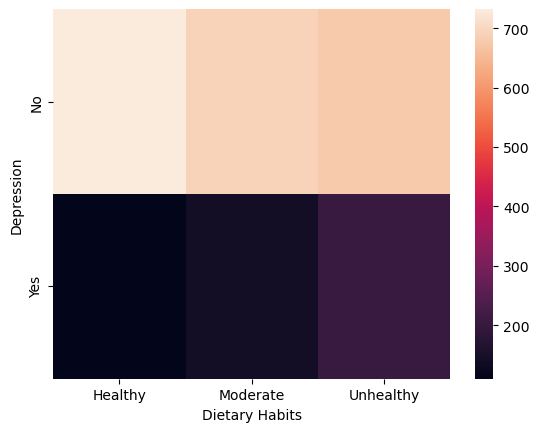

In [55]:
sns.heatmap(pd.crosstab(df['Depression'],df['Dietary Habits']))

In [56]:
pd.crosstab(df['Depression'],df['Family History of Mental Illness']).T

Depression,No,Yes
Family History of Mental Illness,,
No,1087,224
Yes,1014,231


In [57]:
df.columns

Index(['Name', 'Gender', 'Age', 'City', 'Working Professional or Student',
       'Profession', 'Academic Pressure', 'Work Pressure', 'CGPA',
       'Study Satisfaction', 'Job Satisfaction', 'Sleep Duration',
       'Dietary Habits', 'Degree', 'Have you ever had suicidal thoughts ?',
       'Work/Study Hours', 'Financial Stress',
       'Family History of Mental Illness', 'Depression', 'New_Degree'],
      dtype='object')

C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\2050140944.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df[df['Depression'] == 'Yes']['Age'], kde=True, color='blue', label='Depression: Yes')
C:\Users\Admin\AppData\Local\Temp\ipykernel_6732\2050140944.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751



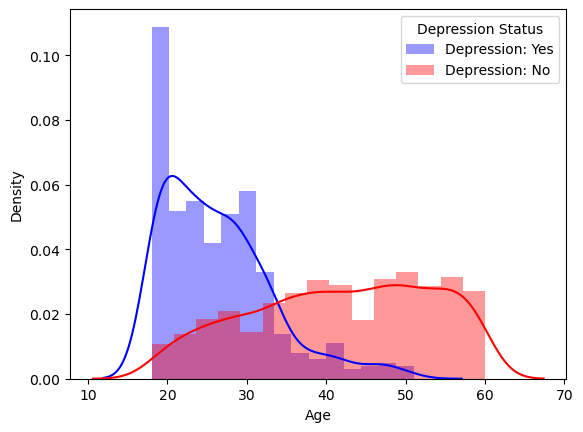

In [308]:
sns.distplot(df[df['Depression'] == 'Yes']['Age'], kde=True, color='blue', label='Depression: Yes')
sns.distplot(df[df['Depression'] == 'No']['Age'], kde=True, color='red', label='Depression: No')

# Adding the legend
plt.legend(title='Depression Status')

<Axes: xlabel='Depression', ylabel='Work/Study Hours'>

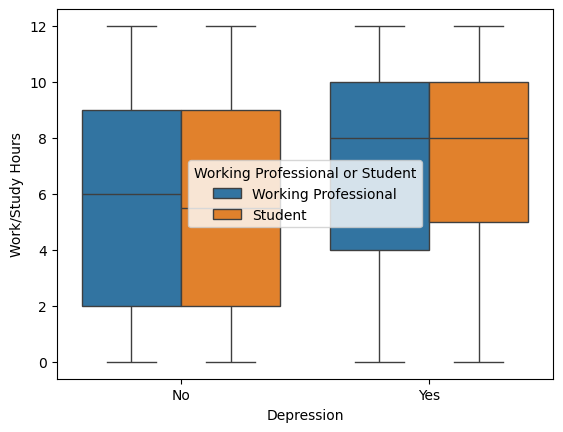

In [59]:
sns.boxplot(x=df['Depression'],y=df['Work/Study Hours'],hue=df['Working Professional or Student'])

In [60]:
df[df['Working Professional or Student']=='Working Professional']['Work/Study Hours']

0        6
1        0
2        0
3        1
4        6
        ..
2550     2
2551    12
2552     8
2553     4
2554     4
Name: Work/Study Hours, Length: 2054, dtype: int64

<Axes: xlabel='Depression', ylabel='Financial Stress'>

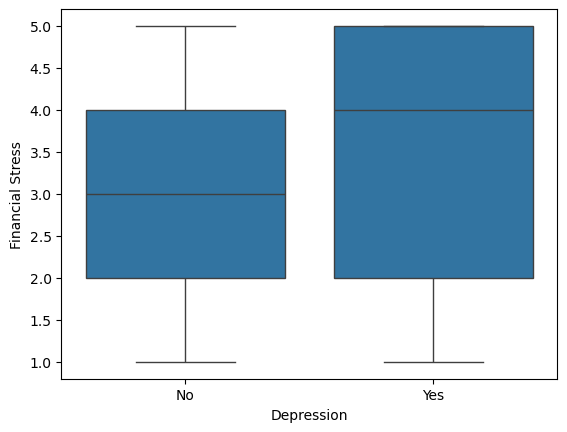

In [61]:
sns.boxplot(x=df['Depression'],y=df['Financial Stress'])

## Statistics

#### Chi Sqaure Test
Hypothesis
* H0: There is no association between the two variables
* H1: There is association between the two variables

In [64]:
DietaryDepression_crosstab = pd.crosstab(df['Dietary Habits'], df['Depression'], margins=True, margins_name="subtotal")

In [65]:
chi, p, dof, expected = chi2_contingency(DietaryDepression_crosstab)

In [66]:
print(f"chi square test:{chi}\np-value: {p}")

chi square test:30.43898594021769
p-value: 3.2430262659053164e-05


In [67]:
SleepDepression_crosstab= pd.crosstab(df['Sleep Duration'],df['Depression'],margins=True,margins_name="subtotal")

In [68]:
chi, p, dof, expected = chi2_contingency(SleepDepression_crosstab)
print(f"chi square test:{chi}\np-value: {p}")

chi square test:11.398765436061394
p-value: 0.18011183330159197


In [69]:
SuicideDepression_crosstab=pd.crosstab(df['Have you ever had suicidal thoughts ?'],df['Depression'],margins=True,margins_name="subtotal")

In [70]:
chi, p, dof, expected = chi2_contingency(SuicideDepression_crosstab)
print(f"chi square test:{chi}\np-value: {p}")

chi square test:202.78578762776084
p-value: 9.460095694516906e-43


In [71]:
WorkingStudentDepression_crosstab=pd.crosstab(df['Working Professional or Student'],df['Depression'],margins=True,margins_name="subtotal")

In [72]:
chi, p, dof, expected = chi2_contingency(WorkingStudentDepression_crosstab)
print(f"chi square test:{chi}\np-value: {p}")

chi square test:448.1087992070819
p-value: 1.1135202349008689e-95


In [73]:
DegreeDepression_crosstab=pd.crosstab(df['New_Degree'],df['Depression'],margins=True,margins_name="subtotal")

In [74]:
chi, p, dof, expected = chi2_contingency(DegreeDepression_crosstab)
print(f"chi square test:{chi}\np-value: {p}")

chi square test:169.22982040506167
p-value: 1.870197509947522e-32


* There is significant association between Dietary Habits and Depression
* There is no association between Sleep Duration and Depression
* There is significant association between Suicidal Thoughts and Depression
* There is significant association between Working Professional or Student and Depression
* There is significant association between Degree and Depression

#### Mann Whitney test
Hypothesis
* H0: The two population are equal
* H1: The two population are unequal

In [77]:
mu1=df[df['Depression']=='Yes']['Financial Stress']
mu2=df[df['Depression']=='No']['Financial Stress']

In [78]:
stats.mannwhitneyu(mu1,mu2)

MannwhitneyuResult(statistic=594801.5, pvalue=6.542130241152281e-17)

In [79]:
stats.ttest_ind(mu1,mu2)

TtestResult(statistic=8.489732340660696, pvalue=3.4592777312833097e-17, df=2554.0)

In [80]:
mu1=df[df['Depression']=='Yes']['Work/Study Hours']
mu2=df[df['Depression']=='No']['Work/Study Hours']

In [81]:
stats.mannwhitneyu(mu1,mu2)

MannwhitneyuResult(statistic=587688.5, pvalue=1.2578951278241103e-14)

In [82]:
stats.ttest_ind(mu1,mu2)

TtestResult(statistic=7.796278558116199, pvalue=9.209207260835383e-15, df=2554.0)

In [83]:
mu1=df[df['Depression']=='Yes']['Age']
mu2=df[df['Depression']=='No']['Age']

In [84]:
stats.mannwhitneyu(mu1,mu2)

MannwhitneyuResult(statistic=128393.0, pvalue=1.4464100265156637e-132)

In [85]:
stats.ttest_ind(mu1,mu2)

TtestResult(statistic=-28.03865279190122, pvalue=4.79882105070224e-151, df=2554.0)

In [86]:
wp1=df[(df['Working Professional or Student']=='Working Professional') & (df['Depression']=='Yes')]['Work Pressure']
wp2=df[(df['Working Professional or Student']=='Working Professional') & (df['Depression']=='No')]['Work Pressure']

In [87]:
stats.mannwhitneyu(wp1,wp2)

MannwhitneyuResult(statistic=258288.0, pvalue=3.2829863438525274e-19)

In [88]:
stats.ttest_ind(wp1,wp2)

TtestResult(statistic=9.126732991547149, pvalue=1.6400614506993963e-19, df=2052.0)

In [89]:
wp1=df[(df['Working Professional or Student']=='Working Professional') & (df['Depression']=='Yes')]['Job Satisfaction']
wp2=df[(df['Working Professional or Student']=='Working Professional') & (df['Depression']=='No')]['Job Satisfaction']

In [90]:
stats.mannwhitneyu(wp1,wp2)

MannwhitneyuResult(statistic=128360.0, pvalue=3.6421697602266796e-14)

In [91]:
stats.ttest_ind(wp1,wp2)

TtestResult(statistic=-7.667023460553809, pvalue=2.698339328782242e-14, df=2052.0)

In [92]:
s1=df[(df['Working Professional or Student']=='Student') & (df['Depression']=='Yes')]['Academic Pressure']
s2=df[(df['Working Professional or Student']=='Student') & (df['Depression']=='No')]['Academic Pressure']

In [93]:
stats.mannwhitneyu(s1,s2)

MannwhitneyuResult(statistic=48464.0, pvalue=1.4730571432329756e-26)

In [94]:
stats.ttest_ind(s1,s2)

TtestResult(statistic=12.111246438686875, pvalue=8.734799837179959e-30, df=500.0)

In [95]:
s1=df[(df['Working Professional or Student']=='Student') & (df['Depression']=='Yes')]['Study Satisfaction']
s2=df[(df['Working Professional or Student']=='Student') & (df['Depression']=='No')]['Study Satisfaction']

In [96]:
stats.mannwhitneyu(s1,s2)

MannwhitneyuResult(statistic=21068.5, pvalue=5.560039193574304e-11)

In [97]:
stats.ttest_ind(s1,s2)

TtestResult(statistic=-6.864793570567851, pvalue=1.980147677410874e-11, df=500.0)

In [98]:
s1=df[(df['Working Professional or Student']=='Student') & (df['Depression']=='Yes')]['CGPA']
s2=df[(df['Working Professional or Student']=='Student') & (df['Depression']=='No')]['CGPA']

In [99]:
stats.ttest_ind(s1,s2)

TtestResult(statistic=0.9997732098496066, pvalue=0.3179038631859054, df=500.0)

* Cgpa has same median level 

In [101]:
df.sample(5)

,Name,Gender,Age,City,Working Professional or Student,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression,New_Degree
20,Ritik,Male,58,Kalyan,Working Professional,Teacher,NaN,1.0,NaN,NaN,2.0,More than 8 hours,Healthy,B.Ed,No,8,4,No,No,UnderGraduate
46,Trisha,Female,22,Faridabad,Working Professional,Financial Analyst,NaN,4.0,NaN,NaN,5.0,5-6 hours,Unhealthy,BBA,Yes,12,3,Yes,Yes,UnderGraduate
2300,Atharv,Male,48,Lucknow,Working Professional,Pharmacist,NaN,2.0,NaN,NaN,4.0,More than 8 hours,Healthy,B.Pharm,No,5,2,No,No,UnderGraduate
2550,Prisha,Female,45,Srinagar,Working Professional,Teacher,NaN,1.0,NaN,NaN,3.0,Less than 5 hours,Healthy,LLM,Yes,2,5,Yes,No,PostGraduate
1237,Shrey,Male,28,Indore,Working Professional,Pharmacist,NaN,1.0,NaN,NaN,2.0,Less than 5 hours,Moderate,MD,Yes,9,1,No,No,PostGraduate


## Feature Engineering

* Label Encoding for Dependent Variable
* OneHotEncoding for Nominal datatype(columns: Gender and Working Professional or Student)
* OrdinalEncoder for Ordinal datatype(Columns: Dietary Habits, New_Degree, Sleep Duration, Family History of Mental Health, Have you ever had suicidal thoughts)
* Simple Imputer for Missing value using Arbitary Value 999

In [104]:
le=LabelEncoder()

In [105]:
transformer=ColumnTransformer(transformers=[
    ('tnf1',OneHotEncoder(drop='first'),['Gender','Working Professional or Student']),
    ('tnf2',OrdinalEncoder(categories=[['Unhealthy','Moderate','Healthy']]),['Dietary Habits']),
    ('tnf3',OrdinalEncoder(categories=[['Class 12','UnderGraduate','PostGraduate','PhD']]),['New_Degree']),
    ('tnf4',OrdinalEncoder(categories=[['Less than 5 hours','5-6 hours','7-8 hours','More than 8 hours']]),['Sleep Duration']),
    ('tnf5',OrdinalEncoder(categories=[['No','Yes']]),['Family History of Mental Illness']),
    ('tnf6',OrdinalEncoder(categories=[['No','Yes']]),['Have you ever had suicidal thoughts ?'])
],remainder='passthrough')

In [106]:
X=df.drop(['Name','City','Profession','Degree','Depression'],axis=1)

In [107]:
y=df.iloc[:,-2]

In [108]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [109]:
le.fit(y_train)

LabelEncoder()

In [110]:
y_train = le.transform(y_train)
y_test = le.transform(y_test)

In [111]:
X_train = pd.DataFrame(transformer.fit_transform(X_train),columns=['Gender','Working Professional or Student','Dietary Habits','New_Degree','Sleep Duration','Family History of Mental Illness','Have you ever had suicidal thoughts ?','Age','Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction','Work/Study Hours',
       'Financial Stress'])
X_test = pd.DataFrame(transformer.fit_transform(X_test),columns=['Gender','Working Professional or Student','Dietary Habits','New_Degree','Sleep Duration','Family History of Mental Illness','Have you ever had suicidal thoughts ?','Age','Academic Pressure',
       'Work Pressure', 'CGPA', 'Study Satisfaction', 'Job Satisfaction','Work/Study Hours',
       'Financial Stress'])


In [112]:
si = SimpleImputer(strategy='constant',fill_value=999,add_indicator=False)

In [113]:
X_train1 = si.fit_transform(X_train)

In [114]:
X_test1 = si.transform(X_test)

## Model Building

### Logistic Regression

In [117]:
from sklearn.linear_model import LogisticRegression

In [118]:
lg=LogisticRegression(max_iter=100,solver='newton-cg')

In [119]:
lg.fit(X_train1,y_train)

LogisticRegression(solver='newton-cg')

In [120]:
ypredlg=lg.predict(X_test1)

In [121]:
accuracy_score(y_test,ypredlg)

0.9859154929577465

In [122]:
cmlg=confusion_matrix(y_test,ypredlg)

In [123]:
print(classification_report(y_test,ypredlg))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99       538
           1       0.96      0.95      0.96       101

    accuracy                           0.99       639
   macro avg       0.98      0.97      0.97       639
weighted avg       0.99      0.99      0.99       639



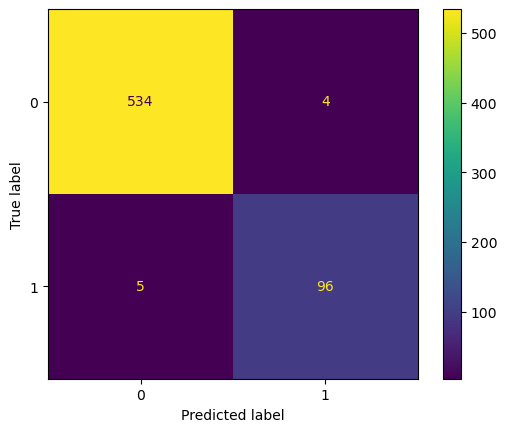

In [124]:
cmlg_display=ConfusionMatrixDisplay(cmlg,display_labels = [0, 1])
cmlg_display.plot()
plt.show()

### KNN

In [126]:
knn=KNeighborsClassifier()

In [127]:
knn.fit(X_train1,y_train)

KNeighborsClassifier()

In [128]:
ypredknn=knn.predict(X_test1)

In [129]:
accuracy_score(y_test,ypredknn)

0.9045383411580594

In [130]:
cmknn=confusion_matrix(y_test,ypredknn)

In [131]:
print(classification_report(y_test,ypredknn))

              precision    recall  f1-score   support

           0       0.94      0.95      0.94       538
           1       0.71      0.67      0.69       101

    accuracy                           0.90       639
   macro avg       0.82      0.81      0.82       639
weighted avg       0.90      0.90      0.90       639



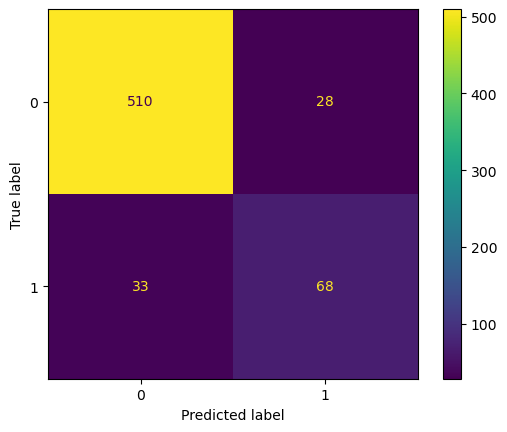

In [132]:
cmknn_display=ConfusionMatrixDisplay(cmknn,display_labels = [0, 1])
cmknn_display.plot()
plt.show()

### Naive Bayes

In [134]:
gb= GaussianNB()

In [135]:
gb.fit(X_train1,y_train)

GaussianNB()

In [136]:
ypredgb= gb.predict(X_test1)

In [137]:
accuracy_score(y_test,ypredgb)

0.8325508607198748

In [138]:
print(classification_report(y_test,ypredgb))

              precision    recall  f1-score   support

           0       0.92      0.88      0.90       538
           1       0.48      0.59      0.53       101

    accuracy                           0.83       639
   macro avg       0.70      0.74      0.71       639
weighted avg       0.85      0.83      0.84       639



In [139]:
cmgb=confusion_matrix(y_test,ypredgb)

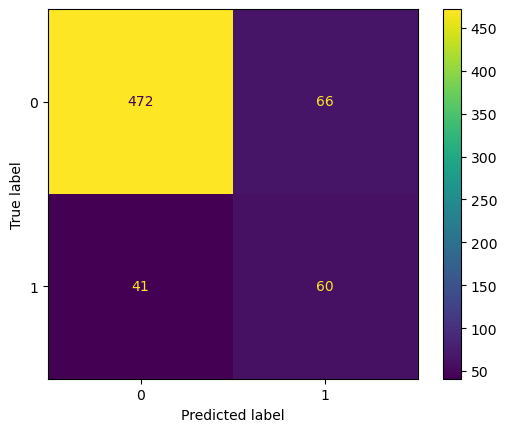

In [140]:
cmgb_display=ConfusionMatrixDisplay(cmgb,display_labels=[0,1])
cmgb_display.plot()

### Decision Tree

In [142]:
dt=DecisionTreeClassifier()

In [143]:
dt.fit(X_train,y_train)

DecisionTreeClassifier()

In [144]:
ypreddt = dt.predict(X_test)

In [145]:
feature_impotance = dt.feature_importances_*100

In [146]:
feature_impotance.shape

(15,)

In [147]:
names = X_train.columns

In [148]:
names.shape

(15,)

In [149]:
Important_Features = pd.DataFrame(feature_impotance,index=names,columns=['Feature_Importance'])

In [150]:
Important_Features.sort_values(by='Feature_Importance',ascending=False)

,Feature_Importance
Age,36.151637
Have you ever had suicidal thoughts ?,13.196715
Academic Pressure,9.730689
Job Satisfaction,8.975930
Work Pressure,7.049834
Work/Study Hours,6.882872
Financial Stress,5.559751
Study Satisfaction,4.409756
Sleep Duration,2.574837
Dietary Habits,2.419071


In [151]:
accuracy_score(y_test,ypreddt)

0.917057902973396

In [152]:
cmdt=confusion_matrix(y_test,ypreddt)

In [153]:
print(classification_report(y_test,ypreddt))

              precision    recall  f1-score   support

           0       0.96      0.94      0.95       538
           1       0.71      0.80      0.75       101

    accuracy                           0.92       639
   macro avg       0.84      0.87      0.85       639
weighted avg       0.92      0.92      0.92       639



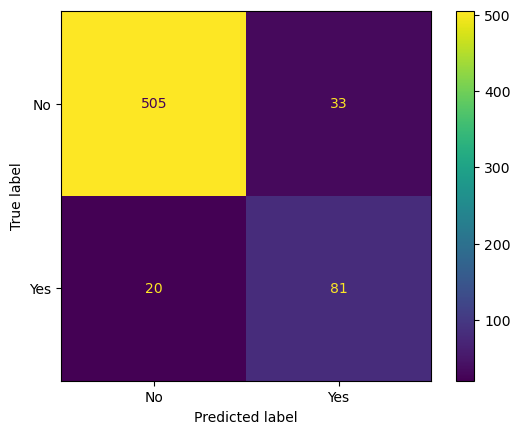

In [154]:
cmdt_display=ConfusionMatrixDisplay(cmdt,display_labels = ['No', 'Yes'])
cmdt_display.plot()
plt.show()

### Random Forest

In [156]:
rf = RandomForestClassifier(
    n_estimators=50,
    random_state=77)

In [157]:
rf.fit(X_train,y_train)
ypredrf = rf.predict(X_test)
accuracy_score(y_test,ypredrf)

0.945226917057903

In [158]:
rf.feature_importances_*100

array([ 1.65005986,  2.84364744,  3.26949166,  4.50106914,  4.03489051,
        1.97015603, 10.2024569 , 22.9291518 , 11.03425729,  5.95964124,
        3.71611436,  6.45562943,  7.21394881,  7.39681465,  6.82267088])

In [159]:
cmrf = confusion_matrix(y_test,ypredrf)

In [160]:
print(classification_report(y_test,ypredrf))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97       538
           1       0.90      0.73      0.81       101

    accuracy                           0.95       639
   macro avg       0.93      0.86      0.89       639
weighted avg       0.94      0.95      0.94       639



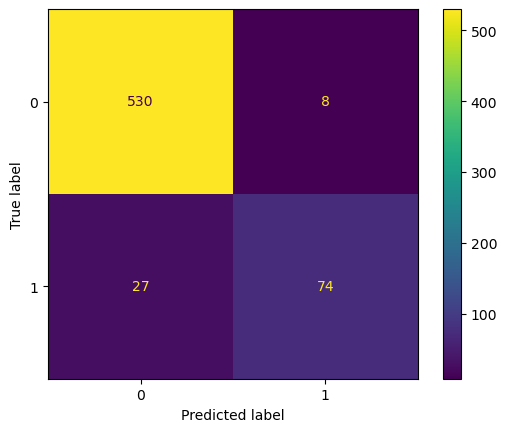

In [161]:
cmrf_display=ConfusionMatrixDisplay(cmrf,display_labels = [0, 1])
cmrf_display.plot()
plt.show()